In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import os
sys.path.append("../../")
import neurotools.emg_tools.hd_sEMG as hd_sEMG #import NeuroNexus_H32_tri
from neurotools.emg_tools.hd_sEMG import NeuroNexus_H32_tri

## Let's look at the electrode geometry

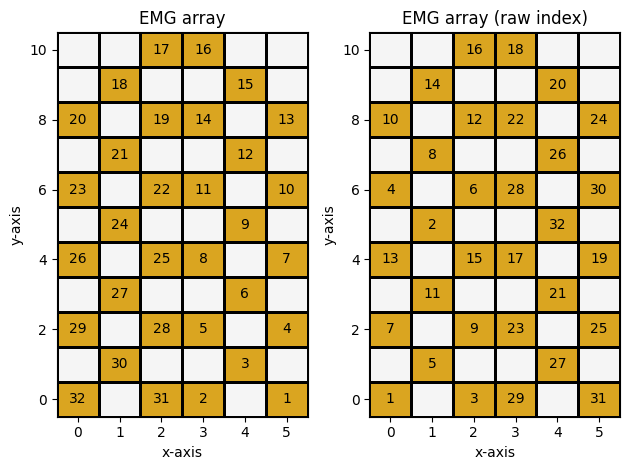

In [2]:
fig, axs = plt.subplots(1,2) 
NeuroNexus_H32_tri.plot_grid(axs[0])
NeuroNexus_H32_tri.plot_grid(axs[1], raw_idx=True)
fig.tight_layout()